In [15]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_moons

feature_names = ["Feature #0", "Feature #1"]
target_name="class"

X, y =make_moons(n_samples=100, noise=0.13, random_state=42)

moons = pd.DataFrame(
    np.concatenate([X, y[:, np.newaxis]], axis=1),
    columns=feature_names + [target_name]

)

X_moons, y_moons = moons[feature_names], moons[target_name]

In [16]:
from sklearn.datasets import make_gaussian_quantiles

X, y = make_gaussian_quantiles(n_samples=100, n_features=2, n_classes=2, random_state=42)

gauss = pd.DataFrame(
    np.concatenate([X, y[:, np.newaxis]], axis=1),
    columns=feature_names + [target_name]
)
X_gauss, y_gauss = gauss[feature_names], gauss[target_name]

In [17]:
xor = pd.DataFrame(
    np.random.RandomState(0).uniform(low=-1, high=1, size=(200,2)),
    columns=feature_names
)
y_xor = np.logical_xor(xor["Feature #0"] > 0, xor["Feature #1"] > 0)
y_xor = y_xor.astype(np.int32)
xor["class"] = y_xor
X_xor = xor[feature_names]

[Text(0.5, 1.0, 'XOR dataset'), Text(0.5, 0, 'Feature #0')]

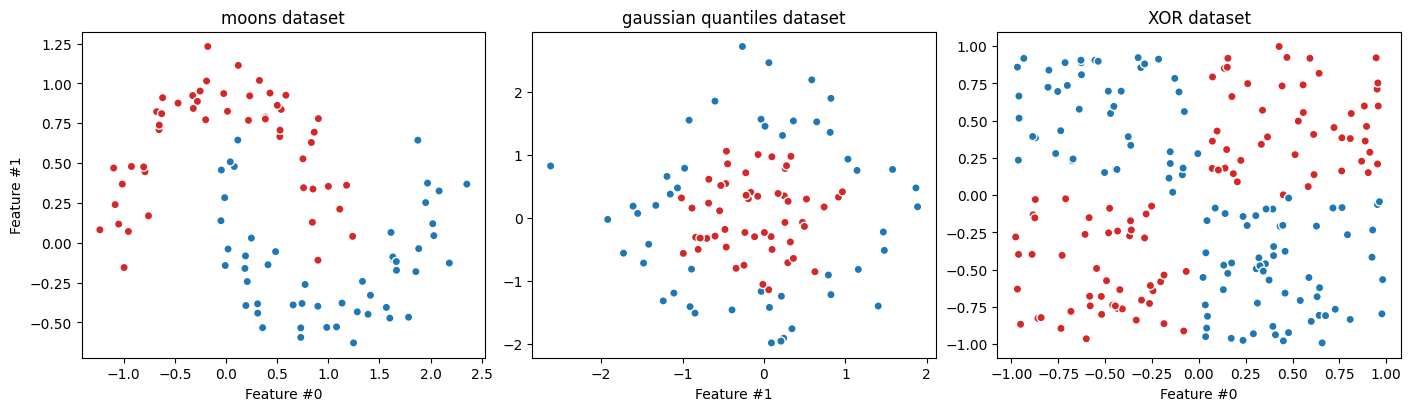

In [19]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

_, axs = plt.subplots(ncols=3, figsize=(14, 4), constrained_layout=True)

common_scatter_plot_params = dict(
    cmap = ListedColormap(["tab:red", "tab:blue"]),
    edgecolor = "white",
    linewidth=1
)

axs[0].scatter(
    X_moons[feature_names[0]],
    X_moons[feature_names[1]],
    c=y_moons,
    **common_scatter_plot_params

)

axs[1].scatter(
    X_gauss[feature_names[0]],
    X_gauss[feature_names[1]],
    c=y_gauss,
    **common_scatter_plot_params
)

axs[2].scatter(
    X_xor[feature_names[0]],
    X_xor[feature_names[1]],
    c=y_xor,
    **common_scatter_plot_params,
)

axs[0].set(
    title="moons dataset",
    xlabel=feature_names[0],
    ylabel=feature_names[1]

)

axs[1].set(
    title="gaussian quantiles dataset",
    xlabel = feature_names[1]
)

axs[2].set(
    title="XOR dataset",
    xlabel=feature_names[0]
)

In [20]:
from sklearn.inspection import DecisionBoundaryDisplay

def plot_decision_boundary(model, title=None):
    datasets = [
        (X_moons, y_moons),
        (X_gauss, y_gauss),
        (X_xor, y_xor)
    ]
    fig, axs = plt.subplots(
        ncols=3,
        figsize=(14,4),
        constrained_layout=True,
    )

    for i, ax, (data, target) in zip(
        range(len(datasets)),
        axs,
        datasets
    ):
        model.fit(data, target)
        DecisionBoundaryDisplay.from_estimator(
            model,
            data,
            response_method="predict_proba",
            plot_method="pcolormesh",
            cmap="RdBu",
            alpha=0.8,
            vmin=0,
            vmax=1,
            ax=ax
        )
        DecisionBoundaryDisplay.from_estimator(
            model,
            data,
            response_method="predict_proba",
            plot_method="contour",
            alpha=0.8,
            levels=[0.5],
            linestyles="--",
            linewidths=2,
            ax=ax
        )

        ax.scatter(
            data[feature_names[0]],
            data[feature_names[1]],
            c=target,
            **common_scatter_plot_params
        )
        if i > 0:
            ax.set_ylabel(None)
    if title is not None:
        fig.suptitle(title)

In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

logistic_regression = make_pipeline(StandardScaler(), LogisticRegression())
logistic_regression

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

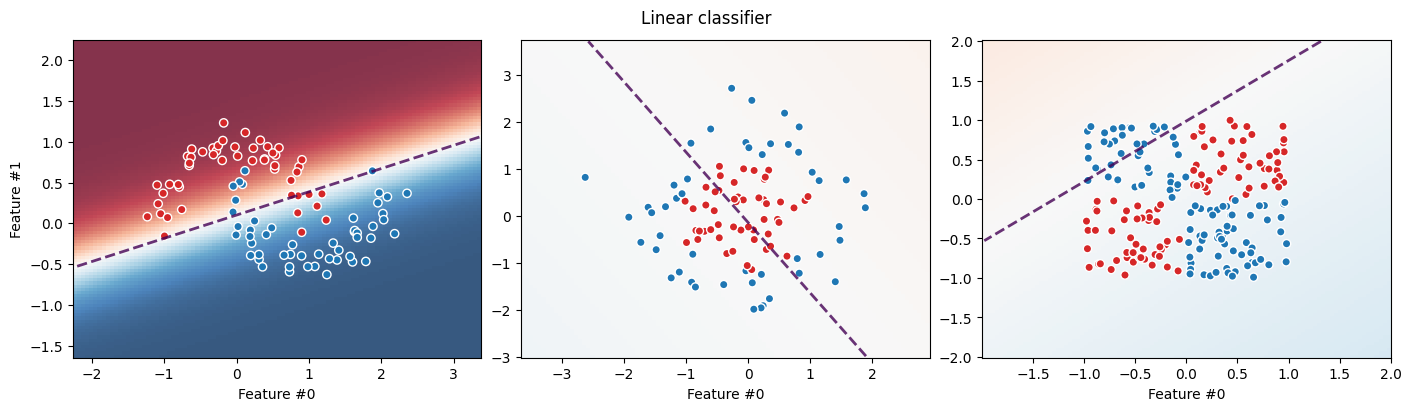

In [22]:
plot_decision_boundary(logistic_regression, title="Linear classifier")

In [23]:
from sklearn.preprocessing import KBinsDiscretizer

classifier = make_pipeline(
    KBinsDiscretizer(n_bins=5, encode="onehot"),
    LogisticRegression()
)
classifier

Pipeline(steps=[('kbinsdiscretizer', KBinsDiscretizer()),
                ('logisticregression', LogisticRegression())])

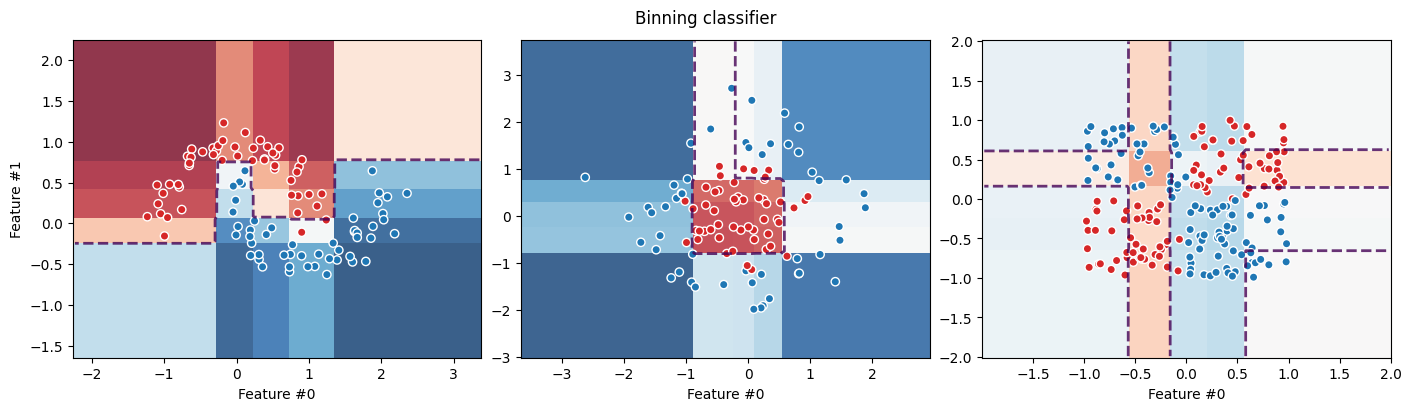

In [24]:
plot_decision_boundary(classifier, title="Binning classifier")

In [25]:
from sklearn.preprocessing import SplineTransformer

classifier = make_pipeline(
    SplineTransformer(degree=3, n_knots=5),
    LogisticRegression()
)
classifier

Pipeline(steps=[('splinetransformer', SplineTransformer()),
                ('logisticregression', LogisticRegression())])

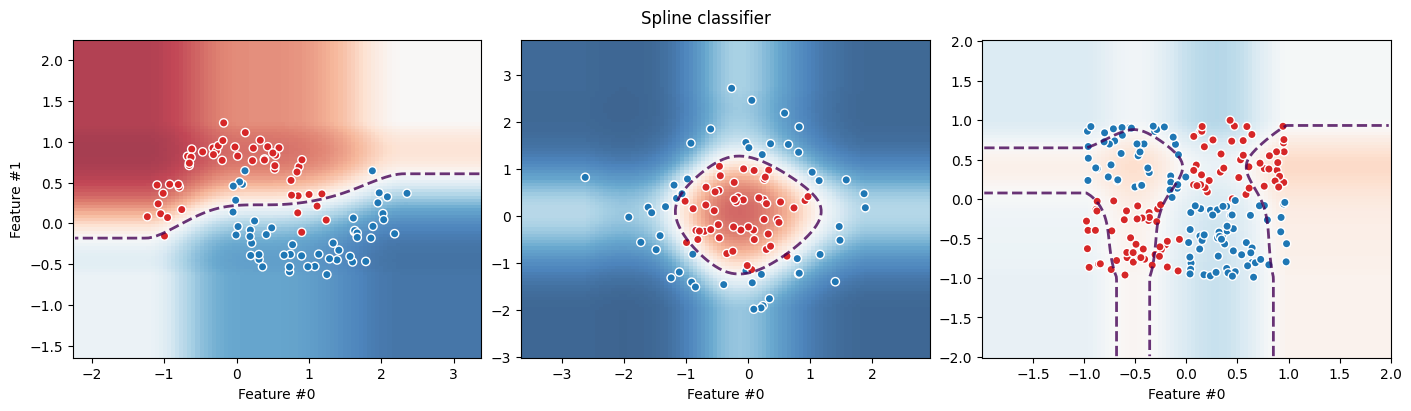

In [26]:
plot_decision_boundary(classifier, title="Spline classifier")

In [27]:
from sklearn.preprocessing import PolynomialFeatures

classifier = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=3, include_bias=False),
    LogisticRegression(C=10)
)
classifier

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('logisticregression', LogisticRegression(C=10))])

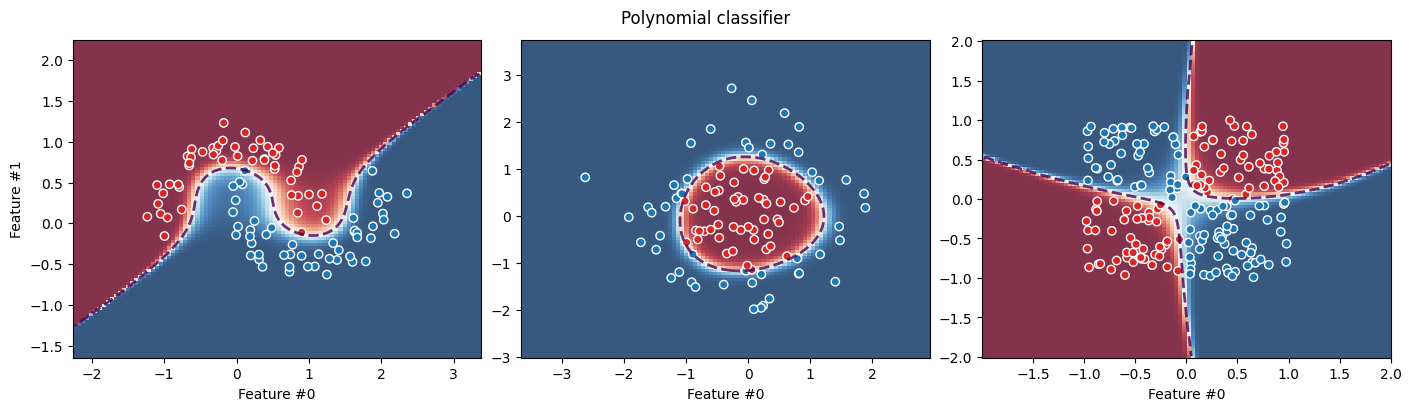

In [28]:
plot_decision_boundary(classifier, title="Polynomial classifier")

In [30]:
from sklearn.kernel_approximation import Nystroem

classifier = make_pipeline(
    StandardScaler(),
    Nystroem(kernel='poly', degree=3, coef0=1, n_components=100),
    LogisticRegression(C=10)
)
classifier

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('nystroem', Nystroem(coef0=1, degree=3, kernel='poly')),
                ('logisticregression', LogisticRegression(C=10))])

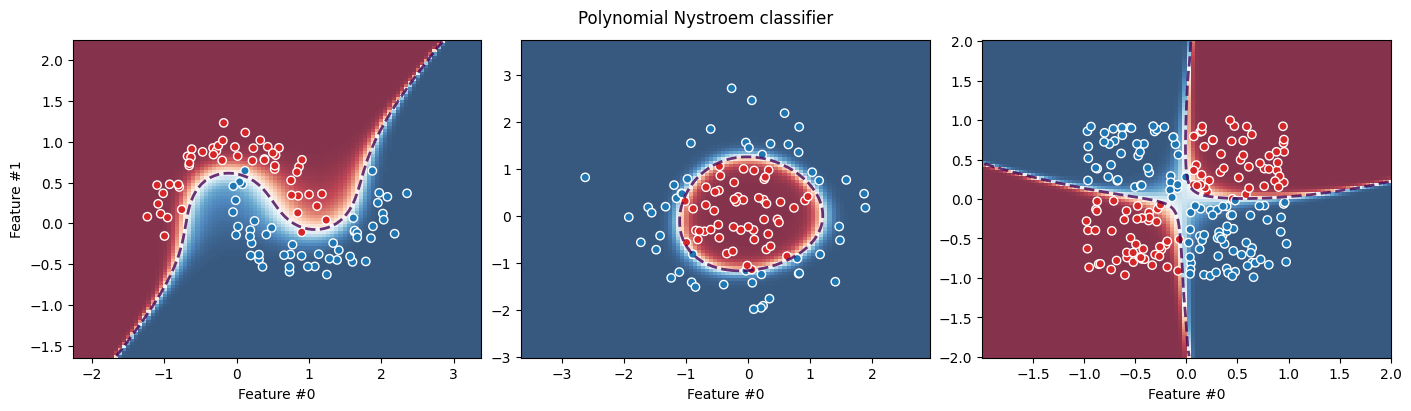

In [31]:
plot_decision_boundary(classifier, title="Polynomial Nystroem classifier")

In [32]:
from sklearn.kernel_approximation import Nystroem

classifier = make_pipeline(
    StandardScaler(),
    Nystroem(kernel="rbf", gamma=1, n_components=100),
    LogisticRegression(C=5)
)
classifier

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('nystroem', Nystroem(gamma=1)),
                ('logisticregression', LogisticRegression(C=5))])

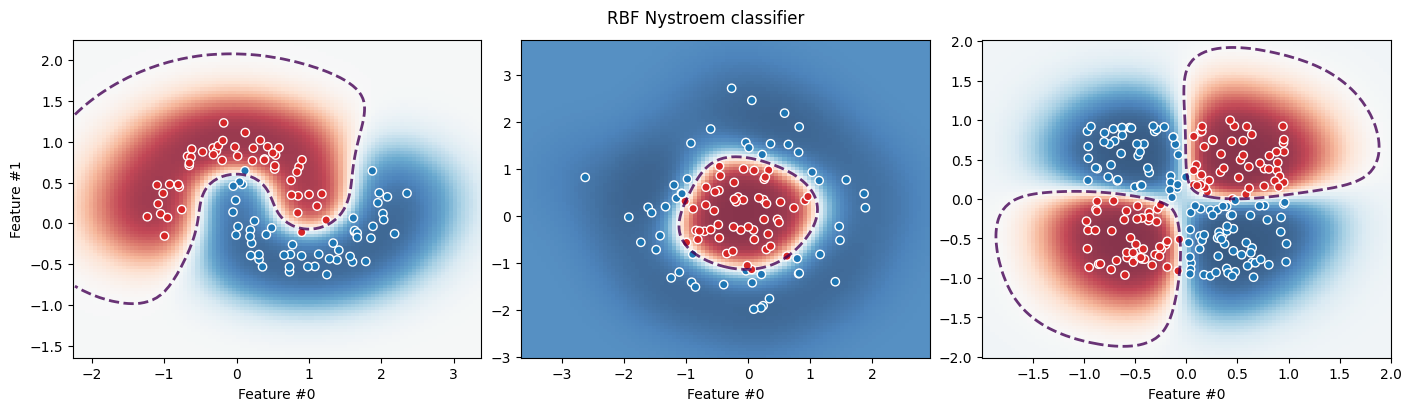

In [33]:
plot_decision_boundary(classifier, title="RBF Nystroem classifier")

In [34]:
classifier = make_pipeline(
    KBinsDiscretizer(n_bins=5),
    Nystroem(kernel="rbf", gamma=1.0, n_components=100),
    LogisticRegression()
)
classifier

Pipeline(steps=[('kbinsdiscretizer', KBinsDiscretizer()),
                ('nystroem', Nystroem(gamma=1.0)),
                ('logisticregression', LogisticRegression())])

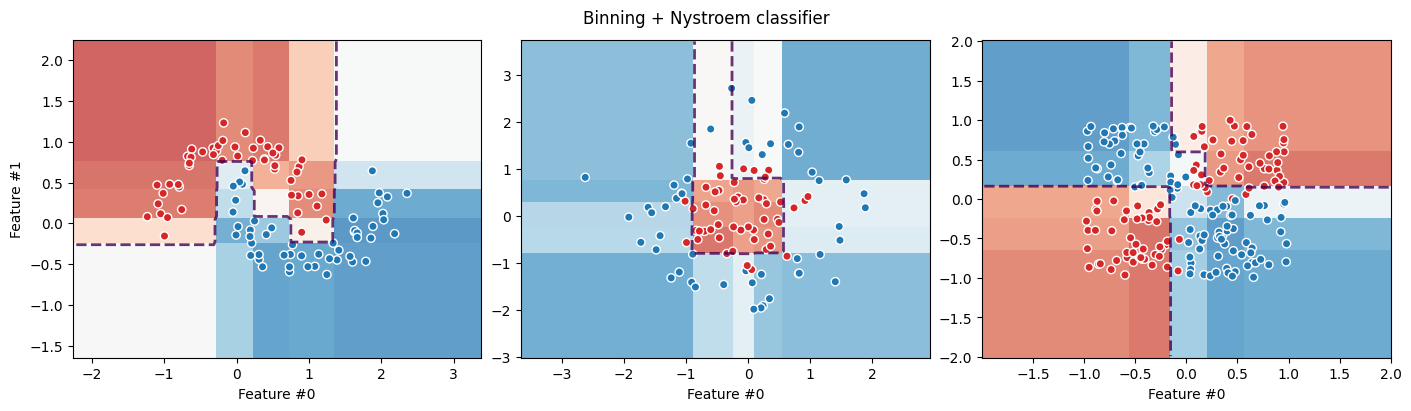

In [35]:
plot_decision_boundary(classifier, title="Binning + Nystroem classifier")

In [36]:
from sklearn.kernel_approximation import Nystroem

classifier = make_pipeline(
    SplineTransformer(n_knots=5),
    Nystroem(kernel='rbf', gamma=1.0, n_components=100),
    LogisticRegression()
)
classifier

Pipeline(steps=[('splinetransformer', SplineTransformer()),
                ('nystroem', Nystroem(gamma=1.0)),
                ('logisticregression', LogisticRegression())])

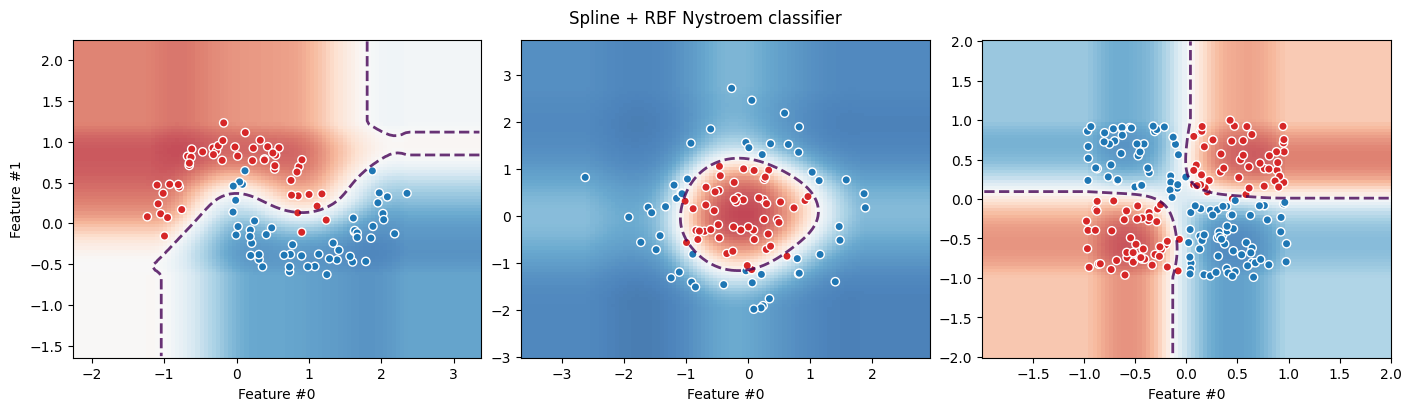

In [38]:
plot_decision_boundary(classifier, title= "Spline + RBF Nystroem classifier")